## comparar os resultados dos algoritmos
Com:  
- Anova
- Teste de Tukey

#### Biblioteca

In [1]:
# Libs
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Base de Dados
df = pd.read_csv('../Amostragem/credit_data.csv')
idade = df['age'].mean()
idade = round(idade, 6)
# Substituindo valores nulos 
df['age'] = df['age'].fillna(idade)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
# Valores de Previsão e classe
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4].values
# Valores mínimo e máximo
min(X[0]), max(X[0])

(59.0170150669292, 66155.9250950813)

#### Padronizando os Dados

In [4]:
# Lib e método
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Valores mínimo e máximo
min(X[0]), max(X[0])

(1.2028194204846914, 1.4539339314851303)

#### Realizando Vários Teste

In [5]:
# Realizando os teste do modelo 50 vezes
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(50):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv = kfold)
    resultados_naive_cv.append(scores.mean())

    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv = kfold)
    resultados_logistica_cv.append(scores.mean())  
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

In [6]:
# A média dos trés resultados
resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9250299999999999, 0.94562, 0.9868299999999999)

### Teste ANOVA

#### Biblioteca

In [7]:
# Lib
from scipy.stats import f_oneway

In [8]:
# Valor de P
_, p = f_oneway(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)
p

1.6031681490916637e-200

In [9]:
# Função de validação de Teste de Hipótese
def teste_hipotese(p):
    alpha = 0.05
    if p <= alpha:
        print('Hipótese nula rejeitada')
    else:
        print('Hipótese alternativa rejeitada')

In [10]:
# Testando a função
teste_hipotese(p)

Hipótese nula rejeitada


#### Teste de Tukey

In [11]:
# Criação do dados para um dataframe
resultados_algoritmos = {
    'accuracy': np.concatenate([resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv]),
    'algoritmo': [
        'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
        'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
        'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
        'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
        'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
        'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
        'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
        'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
        'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
        'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
        'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
        'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
        'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
        'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
        'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest'
    ]
}

In [12]:
# Criando um dataframe
ds_pd = pd.DataFrame(resultados_algoritmos)
ds_pd

,accuracy,algoritmo
0,0.9250,naive
1,0.9245,naive
2,0.9255,naive
3,0.9260,naive
4,0.9240,naive
...,...,...
145,0.9865,forest
146,0.9885,forest
147,0.9840,forest
148,0.9880,forest


#### Biblioteca

In [13]:
# Lib
from statsmodels.stats.multicomp import MultiComparison

In [14]:
# Criando uma variável para armazenar a comparação 
compara_grupos = MultiComparison(ds_pd['accuracy'], ds_pd['algoritmo'])

In [15]:
# Visualizando o teste
teste = compara_grupos.tukeyhsd()
print(teste)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
  forest logistic  -0.0412   0.0 -0.0417 -0.0407   True
  forest    naive  -0.0618   0.0 -0.0623 -0.0613   True
logistic    naive  -0.0206   0.0 -0.0211 -0.0201   True
-------------------------------------------------------


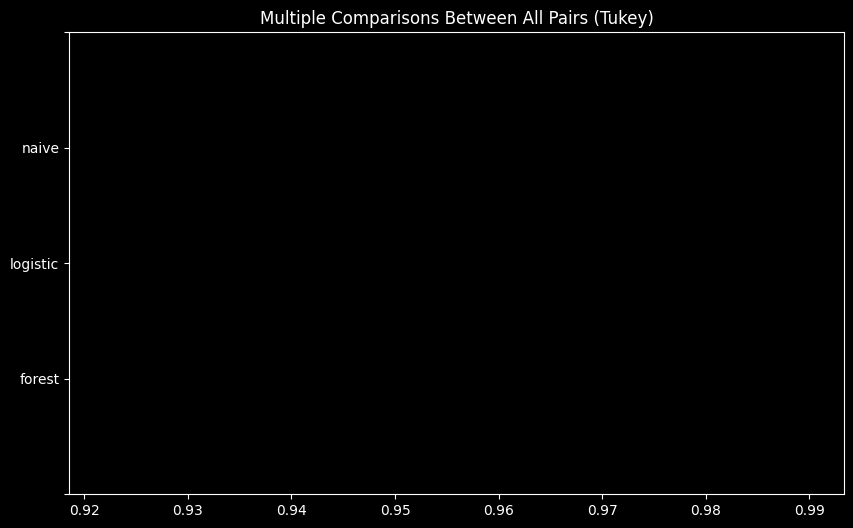

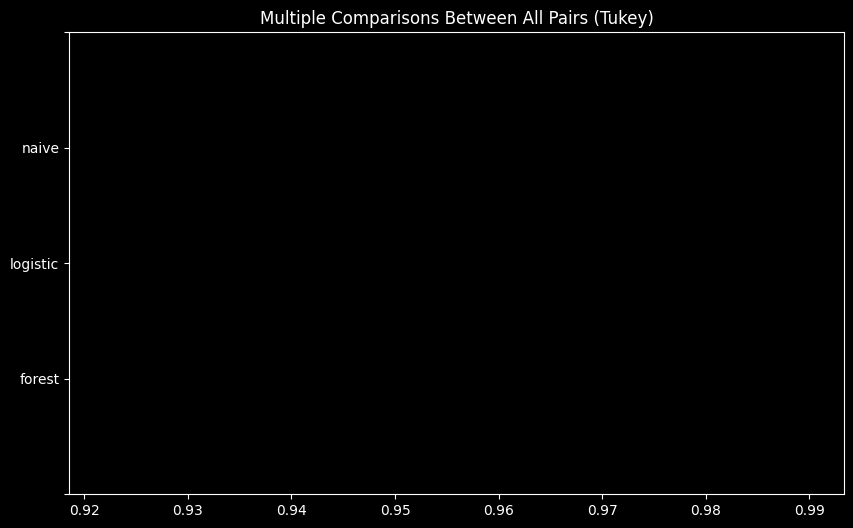

In [16]:
# Gráfico
teste.plot_simultaneous()
